# Top Quark Mass Analysis
### Mehul Kumar Gohil - 200065410 


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("datafile (1).csv")
df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J1_Py,J1_Pz,J2_E,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,83141.7,100690.0,153528.0,24049.1,36265.6,-147189.0,62572.0,-33733.80,-15020.8,-50334.600
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,44228.2,104774.0,49101.6,37159.0,-12960.1,-28853.1,31804.9,-28743.60,11803.6,-203.991
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,35725.8,-14619.2,82184.9,32212.0,13286.3,-73960.8,68410.5,8936.84,32453.5,59377.200
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,62414.2,-24681.6,85371.5,-40072.9,-22510.0,71706.7,112722.0,19212.20,-19288.7,-109245.000
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,62056.2,-110476.0,168499.0,14308.5,42066.1,-162219.0,55170.7,9476.58,-26691.3,46793.300


In [2]:
# remove extra spaces in columns
df.columns = df.columns.str.strip()
df.columns

Index(['Event', 'mu_E', 'mu_Px', 'mu_Py', 'mu_Pz', 'B1_E', 'B1_Px', 'B1_Py',
       'B1_Pz', 'B2_E', 'B2_Px', 'B2_Py', 'B2_Pz', 'J1_E', 'J1_Px', 'J1_Py',
       'J1_Pz', 'J2_E', 'J2_Px', 'J2_Py', 'J2_Pz', 'J3_E', 'J3_Px', 'J3_Py',
       'J3_Pz'],
      dtype='object')

In [3]:
def m12_mass(row):
    E_tot = (row['J1_E'] + row['J2_E'])**2
    x = (row['J1_Px'] + row['J2_Px'])**2
    y = (row['J1_Py'] + row['J2_Py'])**2
    z = (row['J1_Pz'] + row['J2_Pz'])**2
    return np.sqrt(E_tot - x - y - z)/1000

def m13_mass(row):
    E_tot = (row['J1_E'] + row['J3_E'])**2
    x = (row['J1_Px'] + row['J3_Px'])**2
    y = (row['J1_Py'] + row['J3_Py'])**2
    z = (row['J1_Pz'] + row['J3_Pz'])**2
    return np.sqrt(E_tot - x - y - z)/1000

def m23_mass(row):
    E_tot = (row['J2_E'] + row['J3_E'])**2
    x = (row['J2_Px'] + row['J3_Px'])**2
    y = (row['J2_Py'] + row['J3_Py'])**2
    z = (row['J2_Pz'] + row['J3_Pz'])**2
    return np.sqrt(E_tot - x - y - z)/1000


df['m12'] = df.apply(m12_mass, axis=1)
df['m13'] = df.apply(m13_mass, axis=1)
df['m23'] = df.apply(m23_mass, axis=1)

df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz,m12,m13,m23
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,24049.1,36265.6,-147189.0,62572.0,-33733.80,-15020.8,-50334.600,252.916238,169.926817,84.489659
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,37159.0,-12960.1,-28853.1,31804.9,-28743.60,11803.6,-203.991,123.034830,147.083750,75.029266
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,32212.0,13286.3,-73960.8,68410.5,8936.84,32453.5,59377.200,67.561152,72.861829,136.678223
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,-40072.9,-22510.0,71706.7,112722.0,19212.20,-19288.7,-109245.000,131.115306,114.612161,188.811045
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,14308.5,42066.1,-162219.0,55170.7,9476.58,-26691.3,46793.300,42.664755,165.862763,189.480680


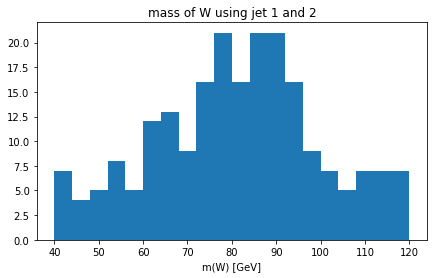

In [4]:
fig = plt.figure(figsize=(7, 4))
plt.hist(df["m12"], bins=20, range=(40,120), label="m(W) [GeV]") 
plt.xlabel("m(W) [GeV]")
plt.title("mass of W using jet 1 and 2")
plt.show()

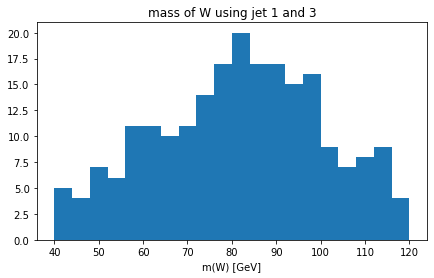

In [5]:
fig = plt.figure(figsize=(7, 4))
plt.hist(df["m13"], bins=20, range=(40,120), label="m(W) [GeV]") 
plt.xlabel("m(W) [GeV]")
plt.title("mass of W using jet 1 and 3")
plt.show()

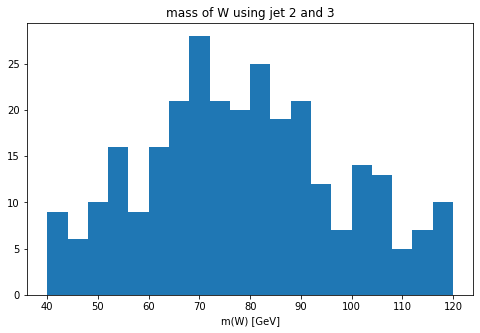

In [6]:
fig = plt.figure(figsize=(8, 5))
plt.hist(df["m23"], bins=20, range=(40,120), label="m(W) [GeV]") 
plt.xlabel("m(W) [GeV]")
plt.title("mass of W using jet 2 and 3")
plt.show()

In [7]:
print("Mean of m12 = ", np.mean(df["m12"]), "Mean of m13 = ", np.mean(df["m13"]), "Mean of m23 = ", np.mean(df["m23"]))

Mean of m12 =  180.14571952820947 Mean of m13 =  144.35286145046047 Mean of m23 =  111.9888310674802


**Upon careful examination of the data, it is apparent that the combination of jet 2 and jet 3 most closely approximates the W boson mass (80 GeV). Consequently, the analysis will proceed using columns corresponding to jet 2 and jet 3.**

In [8]:
def B1_J23_mass(row):
    E_tot = (row['B1_E'] + row['J2_E'] + row['J3_E'])**2
    x = (row['B1_Px'] + row['J2_Px'] + row['J3_Px'])**2
    y = (row['B1_Py'] + row['J2_Py'] + row['J3_Py'])**2
    z = (row['B1_Pz'] + row['J2_Pz'] + row['J3_Pz'])**2
    return np.sqrt(E_tot - x - y - z)/1000

def B2_J23_mass(row):
    E_tot = (row['B2_E'] + row['J2_E'] + row['J3_E'])**2
    x = (row['B2_Px'] + row['J2_Px'] + row['J3_Px'])**2
    y = (row['B2_Py'] + row['J2_Py'] + row['J3_Py'])**2
    z = (row['B2_Pz'] + row['J2_Pz'] + row['J3_Pz'])**2
    return np.sqrt(E_tot - x - y - z)/1000


df['B1_J23'] = df.apply(B1_J23_mass, axis=1)
df['B2_J23'] = df.apply(B2_J23_mass, axis=1)

df.head()

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,...,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz,m12,m13,m23,B1_J23,B2_J23
0,0,51268.2,23427.4,-30694.4,33725.70,144539.0,30556.9,-124646.0,66221.10,41345.7,...,-147189.0,62572.0,-33733.80,-15020.8,-50334.600,252.916238,169.926817,84.489659,318.892905,162.638597
1,8,62607.2,-55928.2,-27403.4,-6382.09,143720.0,-90881.3,80127.7,-76677.30,63423.3,...,-28853.1,31804.9,-28743.60,11803.6,-203.991,123.034830,147.083750,75.029266,161.988358,120.161758
2,41,175318.0,110076.0,-128700.0,45341.20,209660.0,-110486.0,118174.0,-132929.00,54280.7,...,-73960.8,68410.5,8936.84,32453.5,59377.200,67.561152,72.861829,136.678223,276.312523,200.196288
3,44,125126.0,32677.8,102847.0,63335.10,75826.2,-60117.0,-44410.6,1588.44,78404.3,...,71706.7,112722.0,19212.20,-19288.7,-109245.000,131.115306,114.612161,188.811045,244.438496,247.329008
4,52,81170.1,45960.6,-38977.6,-54377.80,209614.0,-41145.2,31890.1,-202909.00,126913.0,...,-162219.0,55170.7,9476.58,-26691.3,46793.300,42.664755,165.862763,189.480680,289.590122,254.274295


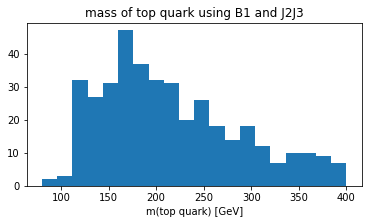

In [9]:
fig = plt.figure(figsize=(6, 3))
plt.hist(df["B1_J23"], bins=20, range = (80, 400) ,label="m(W) [GeV]") 
plt.xlabel("m(top quark) [GeV]")
plt.title("mass of top quark using B1 and J2J3")
plt.show()

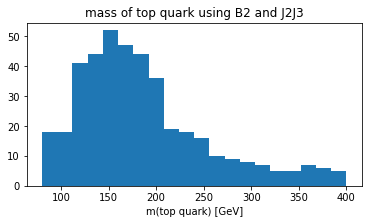

In [10]:
fig = plt.figure(figsize=(6, 3))
plt.hist(df["B2_J23"], bins=20, range=(80, 400), label="m(W) [GeV]") 
plt.xlabel("m(top quark) [GeV]")
plt.title("mass of top quark using B2 and J2J3")
plt.show()

In [11]:
np.mean(df["B1_J23"])

253.6018768710394

In [12]:
np.mean(df["B2_J23"])

203.55705674976616

**Through the analysis of the two averages presented above it becomes evident that the appropriate combination consists of B2 and jets 2 and 3. This conclusion is based on the initial assumption that the top quark possesses a mass less than 250 GeV.**

**In summary, the accurate determination of the top quark mass is achieved through the combination of B2 (representing the bottom quark) and jets 2 and 3 (denoted as J2J3).**

In [13]:
data = df["B2_J23"]

# Calculate the mean and uncertainty
mean = np.mean(data)
uncertainty = np.std(data) / np.sqrt(len(data))


print("Mean: {:.2f}".format(mean))
print("Uncertainty: {:.2f}".format(uncertainty))


Mean: 203.56
Uncertainty: 5.07
